This code is a Python script that demonstrates the creation and training of a deep learning neural network for the CIFAR-10 dataset using the Keras library with a TensorFlow backend. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, and the goal of this script is to build a neural network that can classify these images into their respective categories. Below is a breakdown of the code with comments:

Here's a summary of what the code does:

It imports the required libraries, including NumPy, Matplotlib, Keras, and TensorFlow.

The CIFAR-10 dataset is loaded and split into training and testing sets. Pixel values are normalized to the range [0, 1].

The neural network architecture is defined with an input layer, two fully connected (Dense) layers with ReLU activation functions, and an output layer with softmax activation for multi-class classification.

The model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

The model is trained on the training data for 10 epochs.

The model's performance is evaluated on the testing data.

The model makes predictions on the testing data and converts the predicted class labels to human-readable class names.

Random test images are selected and displayed along with their actual and predicted class labels for visual inspection.

The code effectively demonstrates the process of building, training, and evaluating a neural network for image classification using the CIFAR-10 dataset


In [1]:
# Deep Learning Neural Network for the CIFAR-10 dataset
# Nov. 16th 2021
# PBA ML, Sila

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10

In [3]:
NUM_CLASSES = 10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
# Test that it is scaled

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train[5400, 17, 9, 1]

0.27450982

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
# Describe the model that we will use here 

In [11]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8605 - accuracy: 0.3266
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6689 - accuracy: 0.4029
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5906 - accuracy: 0.4343
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5380 - accuracy: 0.4521
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5035 - accuracy: 0.4650
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4753 - accuracy: 0.4744
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4488 - accuracy: 0.4836
Epoch 8/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4268 - accuracy: 0.4920
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4042 - accuracy: 0.5009
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/ste

In [15]:
#Analysis

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4407 - accuracy: 0.4854


[1.4407455921173096, 0.48539999127388]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 0s 1ms/step


In [18]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

In [19]:
print(indices)

[7533 1180 9788 3316 3203  391  566 8640 8694 6113]


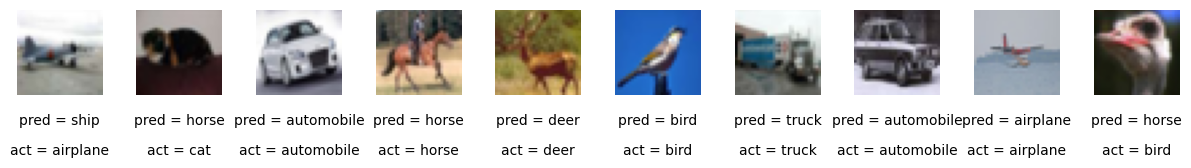

In [20]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)